# 三维向量

## 绘制三维向量

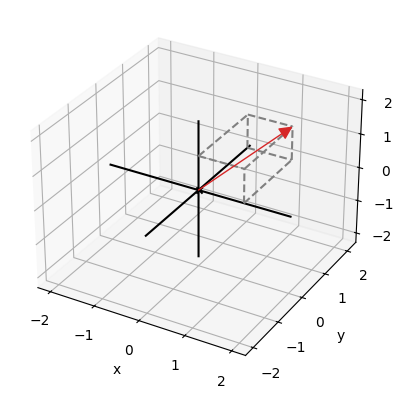

In [2]:
from py_lib.draw3d import draw3d, Arrow3D, Box3D

draw3d(
    Arrow3D((1, 2, 1), (0, 0, 0)),
    Box3D(1, 2, 1)
)

## 三维向量的运算

### 三维向量加法

In [3]:
def add(*vectors):
    """
    支持对多个维度的多个向量求和
    :param vectors: 向量列表
    :return: 向量的和
    """
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)


print(f'三维向量加法：add((1, 2, 3), (4, 5, 6)) = {add((1, 2, 3), (4, 5, 6))}')
print(f'五维向量加法：add((1, 2, 3, 4, 5), (6, 7, 8, 9, 10)) = {add((1, 2, 3, 4, 5), (6, 7, 8, 9, 10))}')

三维向量加法：add((1, 2, 3), (4, 5, 6)) = (5, 7, 9)
五维向量加法：add((1, 2, 3, 4, 5), (6, 7, 8, 9, 10)) = (7, 9, 11, 13, 15)


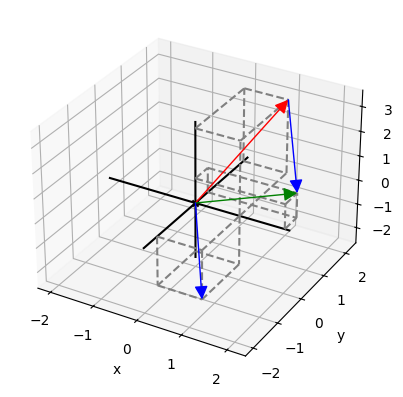

In [4]:
draw3d(
    # 红色箭头向量1
    Arrow3D((1, 2, 3), (0, 0, 0), color='red'),
    Box3D(1, 2, 3),
    # 蓝色箭头向量2
    Arrow3D((1, -1.5, -2), (0, 0, 0), color='blue'),
    Box3D(1, -1.5, -2),
    # 移动蓝色箭头向量2到红色箭头向量1的尾部
    Arrow3D((2, 0.5, 1), (1, 2, 3), color='blue'),
    # 绿色箭头向量1+向量2的和
    Arrow3D(add((1, 2, 3), (1, -1.5, -2)), (0, 0, 0), color='green'),
    Box3D(*add((1, 2, 3), (1, -1.5, -2)))
)

可以看到，三维向量的加法与二维向量的加法类似，也是将一个向量的起点移动到另一个向量的终点，然后连接两个向量的起点和终点，得到一个新的向量。

### 三维向量减法

In [5]:
def subtract(*vectors):
    """
    向量减法
    :param vectors:
    :return:
    """
    by_coordinate = zip(*vectors)
    coordinate_diffs = [coords[0] - sum(coords[1:]) for coords in by_coordinate]
    return tuple(coordinate_diffs)


print(f'三维向量减法：subtract((1, 2, 3), (4, 5, 6)) = {subtract((1, 2, 3), (4, 5, 6))}')
print(f'五维向量减法：subtract((1, 2, 3, 4, 5), (6, 7, 8, 9, 10)) = {subtract((1, 2, 3, 4, 5), (6, 7, 8, 9, 10))}')

三维向量减法：subtract((1, 2, 3), (4, 5, 6)) = (-3, -3, -3)
五维向量减法：subtract((1, 2, 3, 4, 5), (6, 7, 8, 9, 10)) = (-5, -5, -5, -5, -5)


### 三维向量数乘

In [6]:
def scalar_multiply(scalar, *vectors):
    """
    向量数乘
    :param scalar: 标量
    :param vectors: 向量列表
    :return: 向量的数乘
    """
    by_coordinate = zip(*vectors)
    scalar_product = [scalar * sum(coords) for coords in by_coordinate]
    return tuple(scalar_product)


print(f'三维向量数乘：scalar_multiply(2, (1, 2, 3)) = {scalar_multiply(2, (1, 2, 3))}')
print(f'五维向量数乘：scalar_multiply(2, (1, 2, 3, 4, 5)) = {scalar_multiply(2, (1, 2, 3, 4, 5))}')

三维向量数乘：scalar_multiply(2, (1, 2, 3)) = (2, 4, 6)
五维向量数乘：scalar_multiply(2, (1, 2, 3, 4, 5)) = (2, 4, 6, 8, 10)


### 三维向量的长度

计算二维向量的长度需要使用勾股定理，计算三维向量的长度同样需要使用勾股定理。

首先需要计算出三维向量在 $x$ 和 $y$ 轴上的投影的长度：

$$
proj_{xy}\|\vec{v}\| = \sqrt{x^2 + y^2}
$$

然后使用这个投影的长度和 $z$ 轴上的长度计算三维向量的长度：

$$
\|\vec{v}\| = \sqrt{proj_{xy}\|\vec{v}\|^2 + z^2}
$$

最后可以得出三维向量的长度公式：

$$
\|\vec{v}\| = \sqrt{(\sqrt{x^2 + y^2})^2 + z^2} = \sqrt{x^2 + y^2 + z^2}
$$

In [13]:
import math


def vector_length(vector):
    """
    计算三维向量的长度
    :param vector: 三维向量
    :return: 三维向量的长度
    """
    return math.sqrt(sum(coord ** 2 for coord in vector))


print(f'三维向量的长度：three_dimensional_vector_length((1, 2, 3)) = {vector_length((1, 2, 3))}')

三维向量的长度：three_dimensional_vector_length((1, 2, 3)) = 3.7416573867739413


## 三维向量球坐标

将在二维坐标轴的极坐标$(r,\theta)$扩展一个维度变为$(r,\theta,\phi)$就成为了三维坐标中的球坐标，其中：
● $r$表示向量的长度。
● $\theta$极角表示向量与$z$轴的夹角。
● $\phi$方位角是向量在$xy$平面的投影向量与$x$轴的夹角。
通过上面的描述，可以对球坐标的三个值进行推导：
1. 首先是向量长度：
$\begin{align}
&r=\sqrt{(\sqrt{x^2+y^2})^2+z^2} \\
&r=\sqrt{x^2+y^2+z^2}
\end{align}$
2. 计算极角$\theta$：
$\begin{align}
&\tan(\theta)=\frac{proj_{xy}\|\vec{v}\|}{z} \\
&\theta=\arctan(\frac{\sqrt{x^2+y^2}}{z})
\end{align}$
3. 计算方位角$\phi$：
$\begin{align}
&\tan(\phi)=\frac{y}{x} \\
&\phi=\arctan(\frac{y}{x})
\end{align}$
4. 最终得出公式：
$(r, \theta, \phi) = (\sqrt{x^2 + y^2 + z^2}, \arctan(\frac{\sqrt{x^2+y^2}}{z}), \arctan(\frac{y}{x}))$


In [8]:
def cartesian_to_spherical(vector):
    """
    笛卡尔坐标转球坐标
    :param vector: 三维向量
    :return: 球坐标
    """
    x, y, z = vector
    r = vector_length(vector)
    theta = math.atan2(y, x)
    phi = math.atan2(z, math.sqrt(x ** 2 + y ** 2))
    return r, theta, phi


print(f'三维向量 (1, 2, 3) 的球坐标为：{cartesian_to_spherical((1, 2, 3))}')

三维向量 (1, 2, 3) 的球坐标为：(3.7416573867739413, 1.1071487177940904, 0.9302740141154721)


## 向量点积和三维向量积

三维向量可以与一个标量相乘，也可以与另一个三维向量相乘，与另一个三维向量相乘有两种方式，一种是点积 $u \cdot v$ ，另一种是向量积（叉积） $u \times v$。

两者的返回值有所不同，点积的返回值是一个标量，向量积的返回值是一个向量。

### 向量的点积

点积的计算公式如下：

$$
u \cdot v = u_1 v_1 + u_2 v_2 + u_3 v_3 \ldots + u_n v_n
$$


In [10]:
def dot_product(u, v):
    """
    三维向量的点积
    :param u: 三维向量
    :param v: 三维向量
    :return: 点积
    """
    return sum(coord1 * coord2 for coord1, coord2 in zip(u, v))

In [12]:
print(f'三维向量 (1, 2, 3) 和 (4, 5, 6) 的点积为：{dot_product((1, 2, 3), (4, 5, 6))}')

print(f'二维向量（1, 1）和（1, -1）的点积为：{dot_product((1, 1), (1, -1))}')

三维向量 (1, 2, 3) 和 (4, 5, 6) 的点积为：32
二维向量（1, 1）和（1, -1）的点积为：0


通过上面计算点积的公式可知，两个向量之间的角度在等于 $90^\circ$ 时，点积的结果为 $0$。
当两个向量之间的角度小于 $90^\circ$ 时，点积的结果为正数。
而当两个向量之间的角度大于 $90^\circ$ 时，点积的结果为负数。

在小于 $90^\circ$ 的情况下，向量的长度越大，点积的结果也越大。相反，在大于 $90^\circ$ 的情况下，向量的长度越大，点积的结果也越小。

In [19]:
print(f'相同方向的两个向量的点积为：{dot_product((2, 4), (4, 8))}')
print(f'两个向量的长度乘积为：{vector_length((2, 4)) * vector_length((4, 8))}')
print(f'相同方向的两个向量的点积为：{dot_product((1, 2), (2, 4))}')
print(f'两个向量的长度乘积为：{vector_length((1, 2)) * vector_length((2, 4))}')

print(f'相反方向的两个向量的点积为：{dot_product((2, 4), (-4, -8))}')
print(f'两个向量的长度乘积为：{vector_length((2, 4)) * vector_length((-4, -8))}')
print(f'相反方向的两个向量的点积为：{dot_product((1, 2), (-2, -4))}')
print(f'两个向量的长度乘积为：{vector_length((1, 2)) * vector_length((-2, -4))}')

相同方向的两个向量的点积为：40
两个向量的长度乘积为：40.00000000000001
相同方向的两个向量的点积为：10
两个向量的长度乘积为：10.000000000000002
相反方向的两个向量的点积为：-40
两个向量的长度乘积为：40.00000000000001
相反方向的两个向量的点积为：-10
两个向量的长度乘积为：10.000000000000002


根据上面的结果可知，在相同和相反方向的两个向量的点积结果等于两个向量长度标量的乘积，可以使用 $\cos(\theta)$ 来表示两个向量之间的角度，其中 $\theta$ 是两个向量之间的夹角。

$$
u \cdot v = \|u\| \|v\| \cos(\theta)
$$

根据上面的公式可以得出两个向量之间的角度公式：

$$
\cos(\theta) = \frac{u \cdot v}{\|u\| \|v\|}
$$

In [20]:
def angle_between(u, v):
    """
    计算两个向量之间的夹角
    :param u: 三维向量
    :param v: 三绗向量
    :return: 夹角
    """
    return math.acos(dot_product(u, v) / (vector_length(u) * vector_length(v)))

In [24]:
def to_degrees(theta):
    """
    弧度转角度
    :param theta: 弧度
    :return: 角度
    """
    return theta * 180 / math.pi

In [36]:
print(f'两个向量 (2, 2) 和 (4, 4) 之间的夹角为：{to_degrees(angle_between((1, 2), (2, 4))):.6f}')
print(f'两个向量 (1, 2) 和 (-2, -4) 之间的夹角为：{to_degrees(angle_between((1, 2), (-2, -4))):.6f}')
print(f'两个向量 (3, 0) 和 (0, 3) 之间的夹角为：{to_degrees(angle_between((3, 0), (0, 3))):.6f}')

两个向量 (2, 2) 和 (4, 4) 之间的夹角为：0.000001
两个向量 (1, 2) 和 (-2, -4) 之间的夹角为：179.999999
两个向量 (3, 0) 和 (0, 3) 之间的夹角为：90.000000


### 向量的叉积

向量叉积有以下特点：

- 两个向量的叉积是一个向量，这个向量垂直于两个向量的平面，方向由右手定则决定。
- 两个向量的叉积的长度等于两个向量为领边的平行四边形的面积。

三维空间有三个标准单位（单位 $1$）向量：

- $i$ 指向 $x$ 轴方向，
- $j$ 指向 $y$ 轴方向，
- $k$ 指向 $z$ 轴方向。

通过叉积的定义和右手定则可以得出三个标准单位向量之间的叉积关系：

$i \times j = k$、
$j \times k = i$、
$k \times i = j$、
$j \times i = -k$、
$k \times j = -i$、
$i \times k = -j$

$i \times i = j \times j = k \times k = 0$

现在有 $a$ 和 $b$ 两个向量，可以通过下面的公式计算两个向量的叉积：

$$
a \times b = (a_1 i + a_2 j + a_3 k) \times (b_1 i + b_2 j + b_3 k)
$$

可以展开为以下公式：

$$
a \times b = a_1 b_1(i \times i) + a_1 b_2(i \times j) + a_1 b_3(i \times k) \ldots
$$

通过上面的标准单位向量之间的叉积关系可以将为 $0$ 的项去除：

$$
a \times b = (a_2 b_3 - a_3 b_2)i + (a_3 b_1 - a_1 b_3)j + (a_1 b_2 - a_2 b_1)k
$$

最后可以将公式表示为以下格式：

$$
a \times b = (a_2 b_3 - a_3 b_2, a_3 b_1 - a_1 b_3, a_1 b_2 - a_2 b_1)
$$

In [37]:
def cross_product(u, v):
    """
    三维向量的叉积
    :param u: 三维向量
    :param v: 三绗向量
    :return: 叉积
    """
    return (
        u[1] * v[2] - u[2] * v[1],
        u[2] * v[0] - u[0] * v[2],
        u[0] * v[1] - u[1] * v[0]
    )

三维向量 (2, 2, 2) 和 (2, -2, 2) 的叉积为：(8, 0, -8)


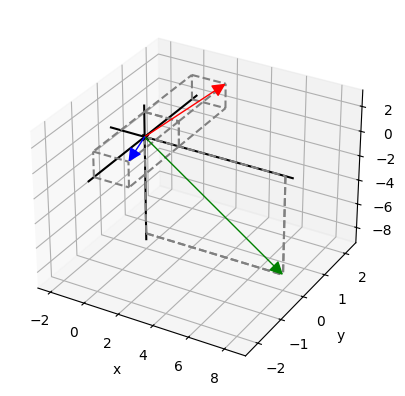

In [41]:
print(f'三维向量 (2, 2, 2) 和 (2, -2, 2) 的叉积为：{cross_product((2, 2, 2), (2, -2, 2))}')

draw3d(
    # 红色箭头向量1
    Arrow3D((2, 2, 2), (0, 0, 0), color='red'),
    Box3D(2, 2, 2),
    # 蓝色箭头向量2
    Arrow3D((2, -2, 2), (0, 0, 0), color='blue'),
    Box3D(2, -2, 2),
    # 绿色箭头向量1x向量2的叉积
    Arrow3D(cross_product((2, 2, 2), (2, -2, 2)), (0, 0, 0), color='green'),
    Box3D(*cross_product((2, 2, 2), (2, -2, 2)))
)